In [1]:
import warnings
warnings.filterwarnings("ignore")

from sklearn import set_config
set_config(transform_output="pandas")

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.ticker as ticker

In [2]:
# veri seti yükleme
energy_data = pd.read_csv("energydata_complete.csv")

In [3]:
# veri setine ait ilk 5 kayıt
energy_data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [4]:
# veri setinin boyutları
energy_data.shape

(19735, 29)

In [5]:
# veri setindeki değişkenler
energy_data.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

Veri Setindeki Değişkenlerin Açıklamaları

| No | **Sıcaklık Değişkenleri (°C)**                      | **Nem Değişkenleri (%)**                        | **Hava Durumu ve Ortam Koşulları**      | **Zaman Değişkenleri**         | **Diğer Değişkenler**       | **Hedef Değişken**                                        |
| -- | --------------------------------------------------- | ----------------------------------------------- | --------------------------------------- | ------------------------------ | --------------------------- | --------------------------------------------------------- |
| 1  | `T1` – Mutfak sıcaklığı                             | `RH_1` – Mutfak nemi                            | `Windspeed` – Rüzgar hızı (m/s)         | `date` – Tarih ve saat bilgisi | `rv1` – Rastgele değişken 1 | `Appliances` – Elektrikli cihazların enerji tüketimi (Wh) |
| 2  | `T2` – Oturma odası sıcaklığı                       | `RH_2` – Oturma odası nemi                      | `Visibility` – Görüş mesafesi (km)      |                                | `rv2` – Rastgele değişken 2 |                                                           |
| 3  | `T3` – Çamaşır odası sıcaklığı                      | `RH_3` – Çamaşır odası nemi                     | `Press_mm_hg` – Atmosfer basıncı (mmHg) |                                |                             |                                                           |
| 4  | `T4` – Ofis odası sıcaklığı                         | `RH_4` – Ofis odası nemi                        | `lights` – Işık tüketimi (Wh)           |                                |                             |                                                           |
| 5  | `T5` – Banyo sıcaklığı                              | `RH_5` – Banyo nemi                             |                                         |                                |                             |                                                           |
| 6  | `T6` – Dış ortam sıcaklığı (kuzey cephesi)          | `RH_6` – Dış ortam nemi (kuzey cephesi)         |                                         |                                |                             |                                                           |
| 7  | `T7` – Ütü odası sıcaklığı                          | `RH_7` – Ütü odası nemi                         |                                         |                                |                             |                                                           |
| 8  | `T8` – Genç odası 2 sıcaklığı                       | `RH_8` – Genç odası 2 nemi                      |                                         |                                |                             |                                                           |
| 9  | `T9` – Ebeveyn yatak odası sıcaklığı                | `RH_9` – Ebeveyn yatak odası nemi               |                                         |                                |                             |                                                           |
| 10 | `T_out` – Genel dış hava sıcaklığı (hava istasyonu) | `RH_out` – Genel dış hava nemi (hava istasyonu) |                                         |                                |                             |                                                           |
| 11 | `Tdewpoint` – Çiy noktası sıcaklığı                 |                                                 |                                         |                                |                             |                                                           |


In [6]:
energy_data.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [7]:
energy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [8]:
# eksik değer kontrolü
energy_data.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [9]:
# tekrarlayan satır kontrolü
energy_data.duplicated().sum()

0

In [10]:
# date sütununu ileride yapılacak analizler için datetime formatına çevirme
energy_data["date"] = pd.to_datetime(energy_data["date"])
energy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         19735 non-null  datetime64[ns]
 1   Appliances   19735 non-null  int64         
 2   lights       19735 non-null  int64         
 3   T1           19735 non-null  float64       
 4   RH_1         19735 non-null  float64       
 5   T2           19735 non-null  float64       
 6   RH_2         19735 non-null  float64       
 7   T3           19735 non-null  float64       
 8   RH_3         19735 non-null  float64       
 9   T4           19735 non-null  float64       
 10  RH_4         19735 non-null  float64       
 11  T5           19735 non-null  float64       
 12  RH_5         19735 non-null  float64       
 13  T6           19735 non-null  float64       
 14  RH_6         19735 non-null  float64       
 15  T7           19735 non-null  float64       
 16  RH_7

In [11]:
# verileri trai/val/test için bölmeden önce tarihe göre sıralama
energy_data.sort_values("date", ascending=True, inplace=True)
energy_data

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [12]:
# Keşifsel veri analizi yapmadan önce verinin ayrılması

# Modelin eğitim sonunda gelecekteki tüketim davranışlarını doğru bir şekilde tahmin edebilmesi için eğitimde geçmiş döneme ait verilerin kullanılması gerekmektedir. 
# Çünkü gerçek hayatta bir model de geçmişe bakarak gelecek veriyi tahmin etmeye çalışır. Bu yüzden eğitim/validasyon/test ayrımında 
# eski, orta dönem ve yeni veriler kullanılarak zaman bütünlüğü korunmalıdır. Bu sayede gelecekteki verilerin geçmişteki verilere sızmasına (data leakage) 
# ve dolayısıyla modelin hatalı değerlendirme yapmasının önüne geçilmiş olunur.


# Veri uzunluğu
total_len = len(energy_data)

# Eğitim seti: %70
train_end = int(0.7 * total_len)

# Doğrulama seti: kalan %30’un yarısı
val_end = train_end + int((total_len-train_end)*0.5)

# Veriler sıralı olduğu için doğrudan indeksleme ile ayırılabilir
train_df = energy_data.iloc[:train_end]
val_df = energy_data.iloc[train_end:val_end]
test_df = energy_data.iloc[val_end:]

print(f"Train veri seti boyutları: {train_df.shape}")
print(f"Val veri seti boyutları: {val_df.shape}")
print(f"Test veri seti boyutları: {test_df.shape}")

Train veri seti boyutları: (13814, 29)
Val veri seti boyutları: (2960, 29)
Test veri seti boyutları: (2961, 29)


In [13]:
def times_df(df):
    df["hour"] = pd.to_datetime(df["date"]).dt.hour
    df["day"] = pd.to_datetime(df["date"]).dt.day
    df["weekday"] = pd.to_datetime(df["date"]).dt.weekday
    df["month"] = pd.to_datetime(df["date"]).dt.month
    
    hours = df.groupby("hour", as_index=False)["Appliances"].sum()
    days = df.groupby("day", as_index=False)["Appliances"].sum()
    weekdays = df.groupby("weekday", as_index=False)["Appliances"].sum()
    months = df.groupby("month", as_index=False)["Appliances"].sum()

    return hours, days, weekdays, months

In [ ]:
def plot_time_series(datasets, labels, colors, kind, time_unit, title, xlabel, ylabel):
    # fig, axs = plt.subplots(1, 3, figsize=(28, 6))
    n = len(datasets)
    fig, axs = plt.subplots(1, n, figsize=(8 * n, 6))
    if n == 1:
        axs = [axs]


    for i, (df, label, color) in enumerate(zip(datasets, labels, colors)):
        hours, days, weekdays, months = times_df(df)

        if time_unit == "hour":
            data = hours
            x_vals = data.index  
            xticklabels = data["hour"]


        elif time_unit == "day":
            data = days
            custom_order = list(dict.fromkeys(df["day"].values))  
            data["day"] = pd.Categorical(data["day"], categories=custom_order, ordered=True)
            df_sorted = data.sort_values("day").reset_index(drop=True)
            x_vals = df_sorted.index  
            xticklabels = df_sorted["day"]

        elif time_unit == "weekday":
            data = weekdays
            x_vals = data.index 
            xticklabels = ["Pzt", "Sal", "Çar", "Per", "Cum", "Cmt", "Paz"] 
            width=0.4

        elif time_unit == "month":
            full_months = pd.Series(range(1, 13))
            data = full_months.to_frame(name="month").merge(months, on="month", how="left").fillna(0)
            x_vals = data.index
            xticklabels = data["month"]
            width=0.6

        else:
            raise ValueError(f"Geçersiz time_unit: {time_unit}")

        # Grafik çizimi
        if kind == "line":
            sns.lineplot(x=x_vals, y=data["Appliances"], ax=axs[i], marker="o", color=color, label=label)
        elif kind == "bar":
            sns.barplot(x=x_vals, y=data["Appliances"], ax=axs[i], color=color, width=width, label=label)
            for bar in axs[i].patches:
                bar.set_edgecolor("black")
        else:
            raise ValueError(f"Geçersiz kind: {kind}")

        axs[i].set_title(f"{label} Veri Seti - {title}")
        axs[i].set_xlabel(xlabel)
        axs[i].set_ylabel(ylabel)
        axs[i].set_xticks(x_vals)
        axs[i].set_xticklabels(xticklabels)
        axs[i].yaxis.set_major_locator(ticker.MaxNLocator(nbins=6, integer=True))
        axs[i].get_legend().remove()


def plot_shared_time_series(datasets, labels, colors, ylabel):
    fig, axs = plt.subplots(1, 2, figsize=(18, 6))

    # ORTAK SAATLİK ÇİZGİ GRAFİĞİ
    for df, label, color in zip(datasets, labels, colors):
        hours, *_ = times_df(df)
        sns.lineplot(x=hours["hour"], y=hours["Appliances"], ax=axs[0], marker="o", label=label, color=color)

    axs[0].set_title("Tüm Setler - Saatlik Enerji Tüketimi (Line Plot)")
    axs[0].set_xlabel("Saat")
    axs[0].set_ylabel(ylabel)
    axs[0].legend()
    axs[0].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

    # ORTAK HAFTANIN GÜNLERİ BAR GRAFİĞİ
    width = 0.25
    for i, (df, label, color) in enumerate(zip(datasets, labels, colors)):
        _, _, weekdays, _ = times_df(df)
        x = weekdays["weekday"] + 1 + i * width
        axs[1].bar(x, weekdays["Appliances"], width=width, label=label, color=color, edgecolor="black")

    axs[1].set_title("Tüm Setler - Haftalık Enerji Tüketimi (Bar Plot)")
    axs[1].set_xlabel("Haftanın Günü")
    axs[1].set_ylabel(ylabel)
    axs[1].set_xticks([i + width for i in range(1, 8)])
    axs[1].set_xticklabels(["Pzt", "Sal", "Çar", "Per", "Cum", "Cmt", "Paz"])
    axs[1].legend()
    axs[1].yaxis.set_major_locator(ticker.MaxNLocator(integer=True))

In [15]:
datasets = [train_df, val_df, test_df]
labels = ["Train", "Validation", "Test"]
colors = ["blue", "orange", "green"]
ylabel="Toplam Enerji Tüketimi"

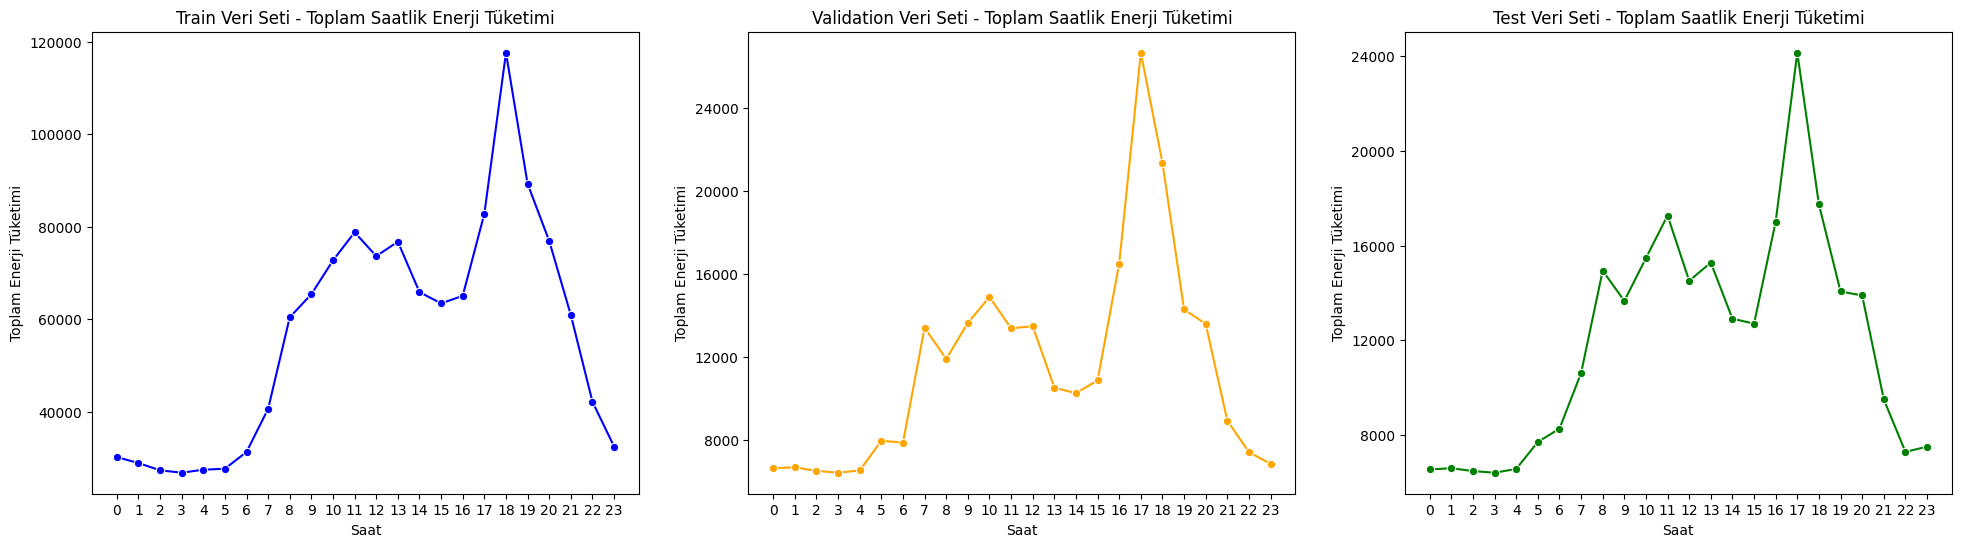

In [16]:
# Saatlik tüketim çizgi grafiği
plot_time_series(datasets, labels, colors, kind="line", time_unit="hour", title="Toplam Saatlik Enerji Tüketimi", xlabel="Saat", ylabel=ylabel)

Train, Validation ve Test veri setlerine ait toplam saatlik enerji tüketimlerine ait bu grafikler incelendiğinde genel olarak saat 22:00 ile 06:00 arası eneji tüketiminin en az olduğu zaman dilimi, saat 15:00 ile 19:00 arası emerji tüketiminin en yoğun olduğu dönem olarak gözükmektedir. Günün orta saatlerinde ise dengeli bir kullanım göze çarpmaktadır. Bu veriler normal bir ev yaşam döngüsündeki saatlik enerji tüketimini yansıtmaktadır. Çünkü tüm veri setlerinde enerji tüketimi sabah saatlerinde artmaya başlayıp akşam saatlerinde zirve yapmakta, gece ise tekrar düşmektedir. Bu nedenle bu desen tipik bir ev yaşam döngüsünü yansıtmaktadır.

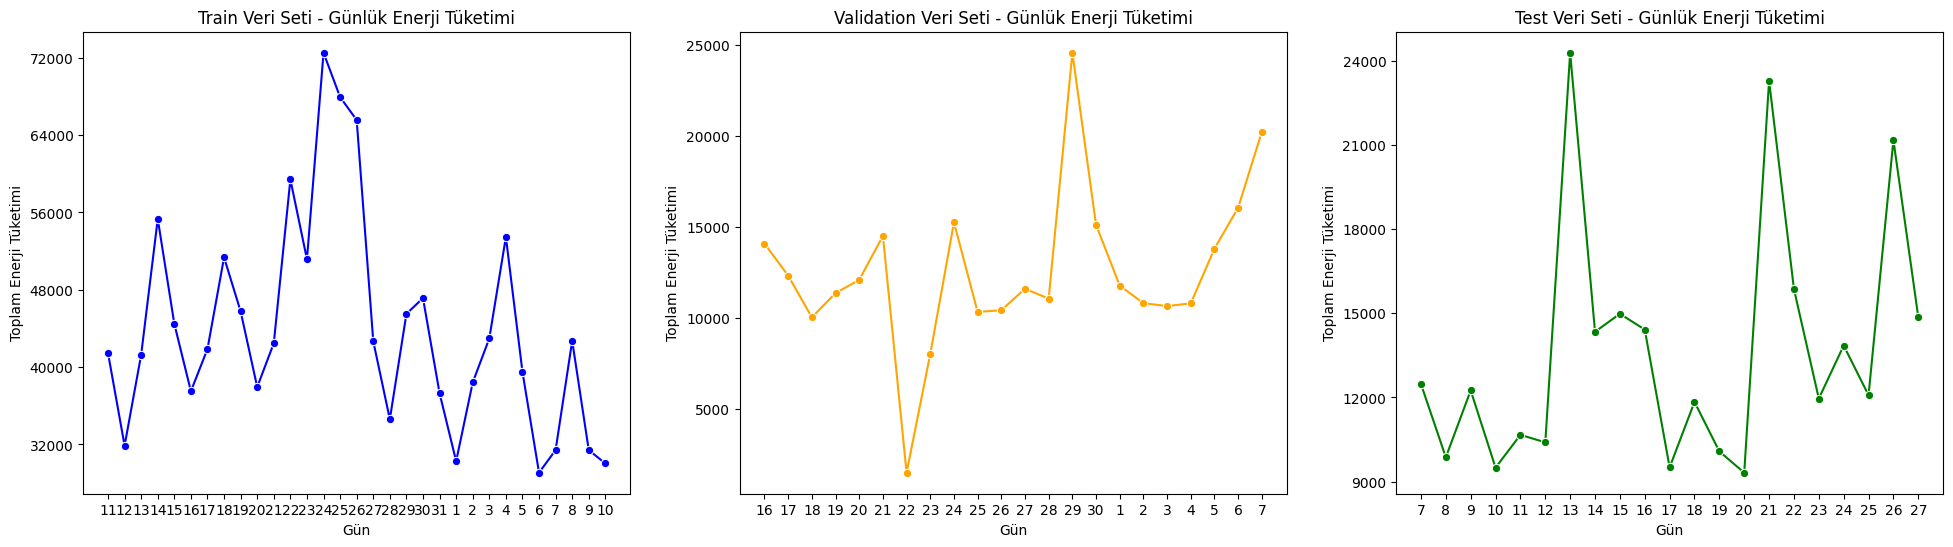

In [17]:
# Günlük tüketim çizgi grafiği
plot_time_series(datasets, labels, colors, kind="line", time_unit="day", title="Günlük Enerji Tüketimi", xlabel="Gün", ylabel=ylabel)

Buradaki veriler incelendiğinde ise her üç veri seti özelinde de dalgalanmalar gözlemlenmektedir. Train veri setinde 24. gün civarında maksimum enerji tüketimi göze çarparken genel olarak 30000-70000 Wh arasında dalalı bir enerji tüketimi vardır.  Validation ve Test veri setlerinde ise train veri setinden ayrı olarak belirgin şekilde enerji tüketiminde bir düşüş vardır. Maksimum enerji tüketimi her iki veri setinde de 25000 Wh civarında seyretmektedir. Bu değer train veri ise setinde 72000 Wh civarında görünmektedir. Ayrıca Validation veri setinde 22.günde önemli bir düşüş gözükmekte ve bu değer bir outlier olarak değerlendirilebilmektedir.

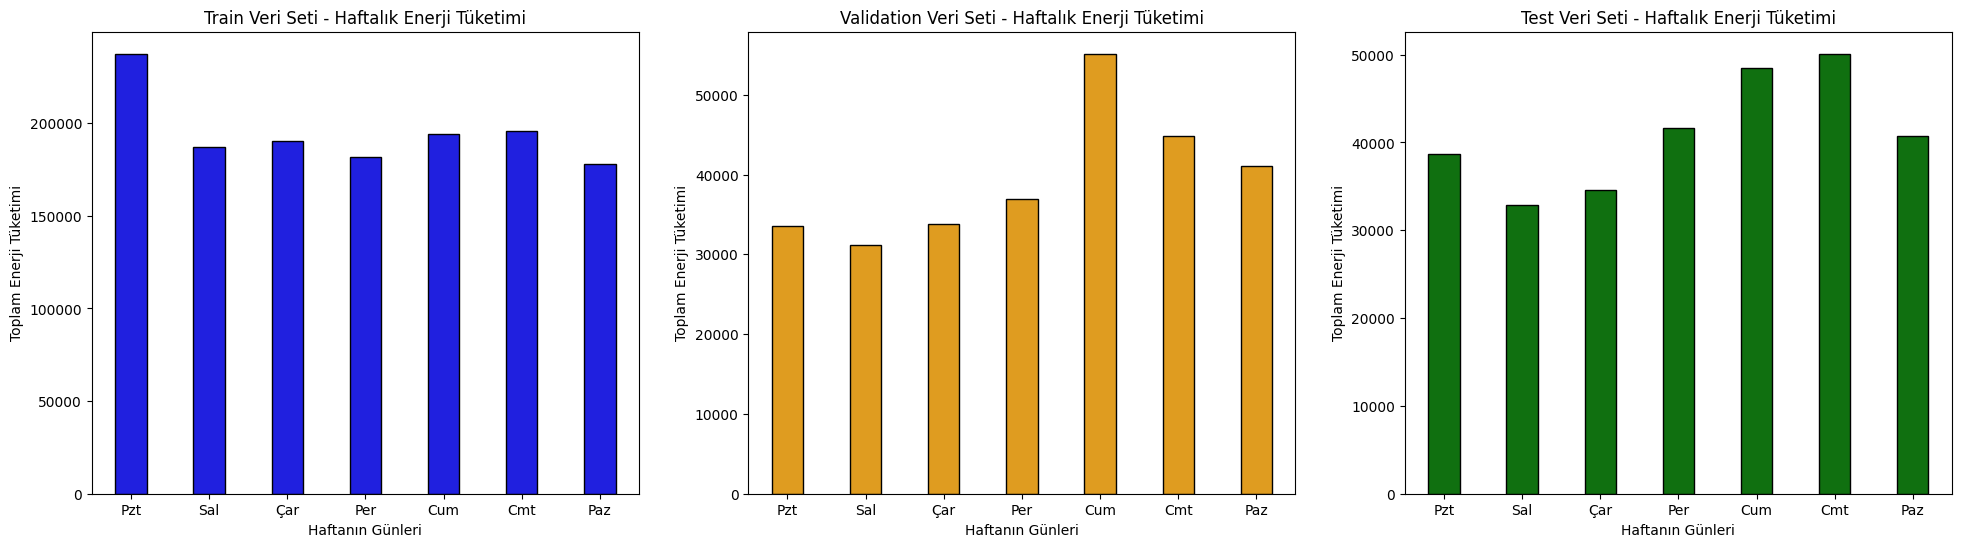

In [18]:
# Haftalık tüketim bar grafiği
plot_time_series(datasets, labels, colors, kind="bar", time_unit="weekday", title="Haftalık Enerji Tüketimi", xlabel="Haftanın Günleri", ylabel=ylabel)

Haftanın günlerini incelediğimizde ise train veri setinde haftanın pazartesi günü hariç dengeli bir tüketim gözükürken validation ve test veri setlerinde ise salı gününden itibaren toplam enerji tüketiminde bir artış görünmektedir. Ayrıca train setindeki haftanın pazartesi ve validation setindeki cuma gününde toplam enerji tüketiminde belirgin bir artış olması bu değerlerin outlier olma ihtimalini göstermektedir. Genel olarak ise validation ve test veri setinin dağılımı birbirine benzer davranış göstermektedir.

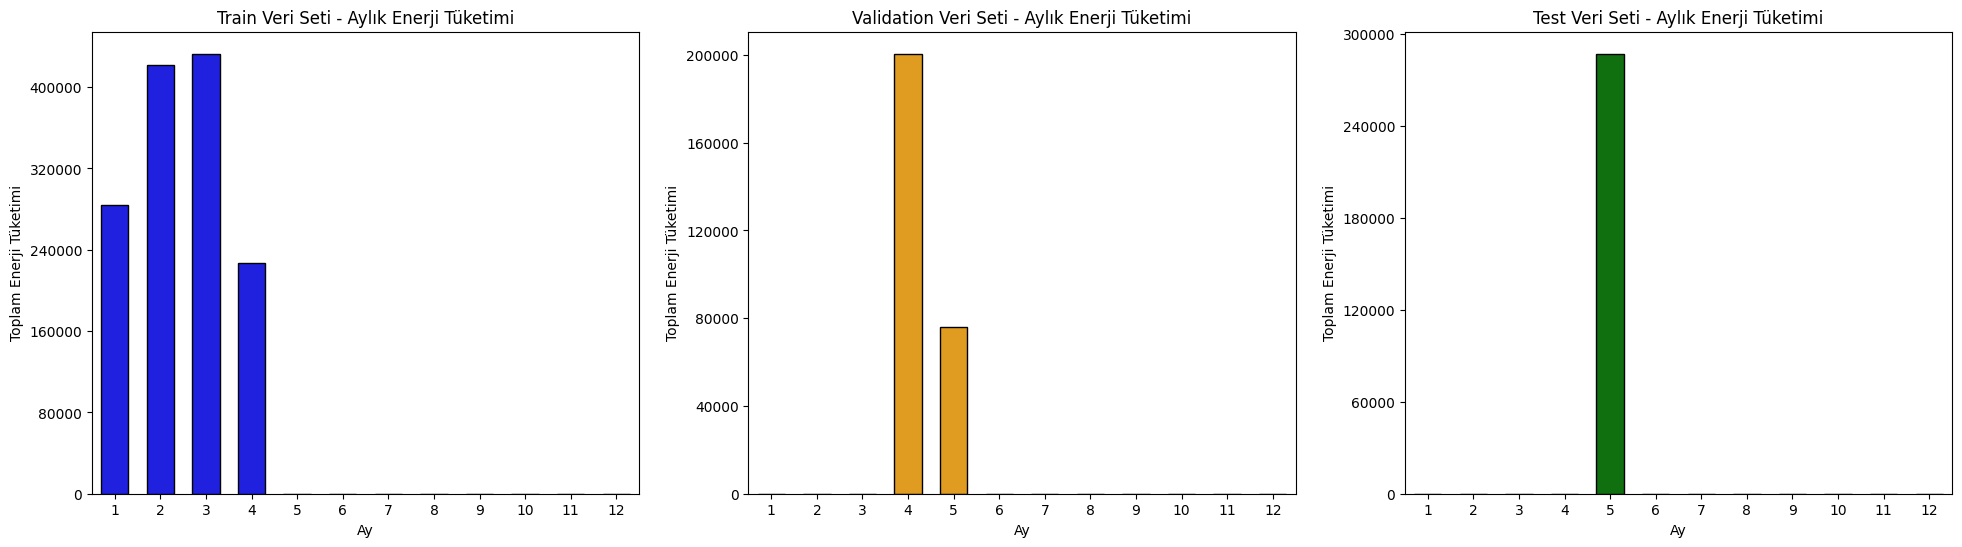

In [19]:
# Aylık tüketim bar grafiği
plot_time_series(datasets, labels, colors, kind="bar", time_unit="month", title="Aylık Enerji Tüketimi", xlabel="Ay", ylabel=ylabel)

Train veri seti daha fazla veri içerdiğinden daha anlamlı trendler görülmektedir. 2. ve 3. ayların yüksek olması, bu aylardaki mevsimlerde ısınma sistemleri nedeniyle daha fazla enerji tüketimi olduğu söylenebilir. Her üç grafikteki bilgileri birleştirirsek ise aslında 2., 3., 4. ve 5. aylarda yaklaşık 400000 Wh enerji tüketimi olarak birbirine yakın değerler gözükmektedir.

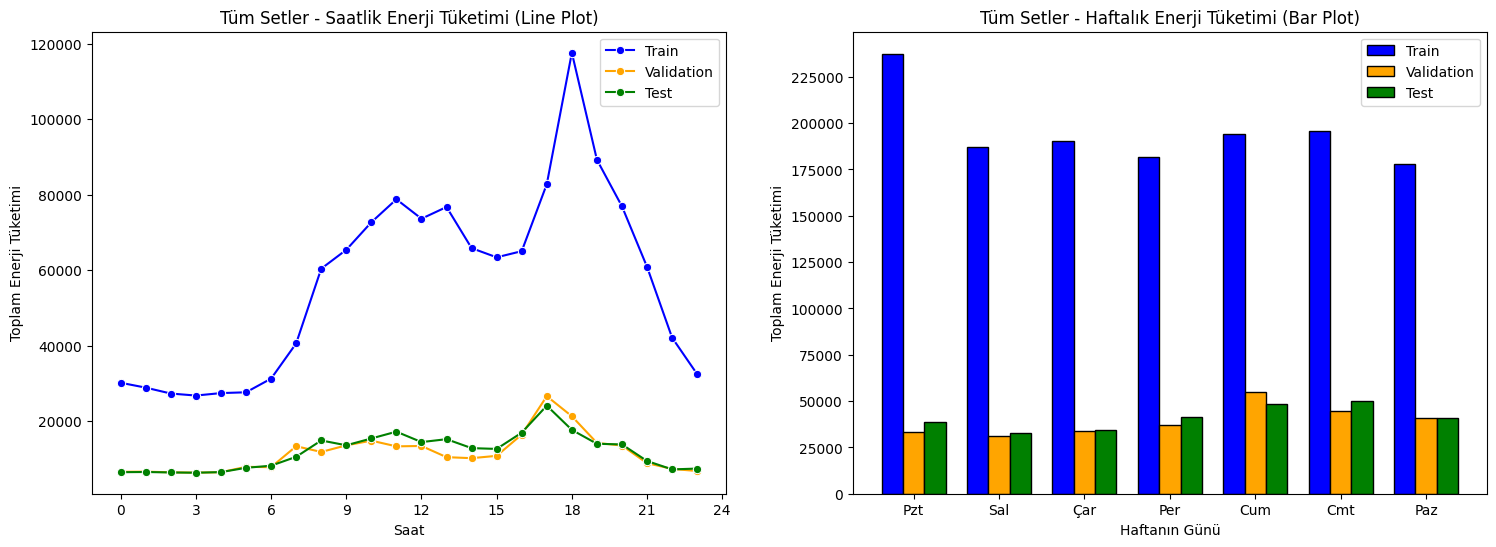

In [20]:
# Ortak saatlik ve haftalık grafik
plot_shared_time_series(datasets, labels, colors, ylabel=ylabel)

Buradaki veriler incelendiğinde ise her iki grafiktede de veri setlerin davranışlarının benzer olduğu görülmektedir. Ancak train veri setindeki verilerin fazla olması nedeniyle değerler daha yüksek çıkmaktadır.